# Lab 2.01 - Australian Athletes (ais)

Import all necessary Python libraries and load the AIS dataset from lab exercise 1.01. Also include the code for setting the index and conversion to categorical variables!

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
URL = "../data/ais.csv"
ais = pd.read_csv(URL)
ais.set_index(['id'])
ais.sex = ais.sex.astype('category')
ais.sport = ais.sport.astype('category')
ais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      202 non-null    int64   
 1   rcc     202 non-null    float64 
 2   wcc     202 non-null    float64 
 3   hc      202 non-null    float64 
 4   hg      202 non-null    float64 
 5   ferr    202 non-null    int64   
 6   bmi     202 non-null    float64 
 7   ssf     202 non-null    float64 
 8   pcBfat  202 non-null    float64 
 9   lbm     202 non-null    float64 
 10  ht      202 non-null    float64 
 11  wt      202 non-null    float64 
 12  sex     202 non-null    category
 13  sport   202 non-null    category
dtypes: category(2), float64(10), int64(2)
memory usage: 20.0 KB


Use an appropriate chart type to visualise the following variables. Are several chart types suitable? Make one of each! Note how some graphs nevertheless give a better insight into the data than other types of graphs.

- `sex`
- `sport`
- `ht` (show this also divided by `sex` and by `sport`.)

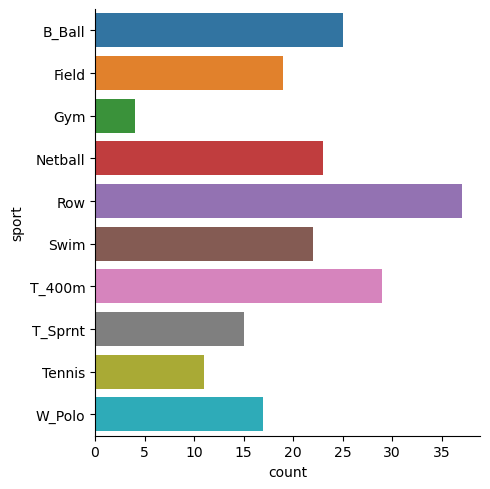

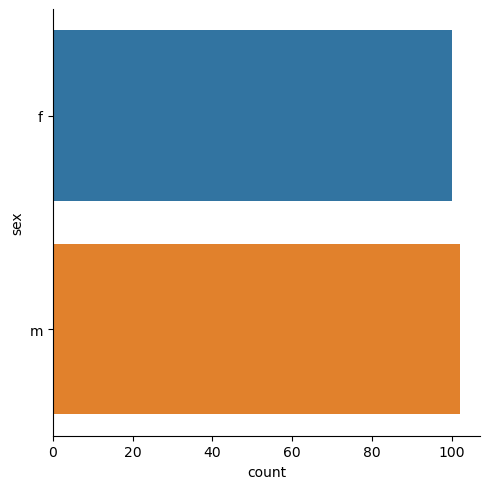

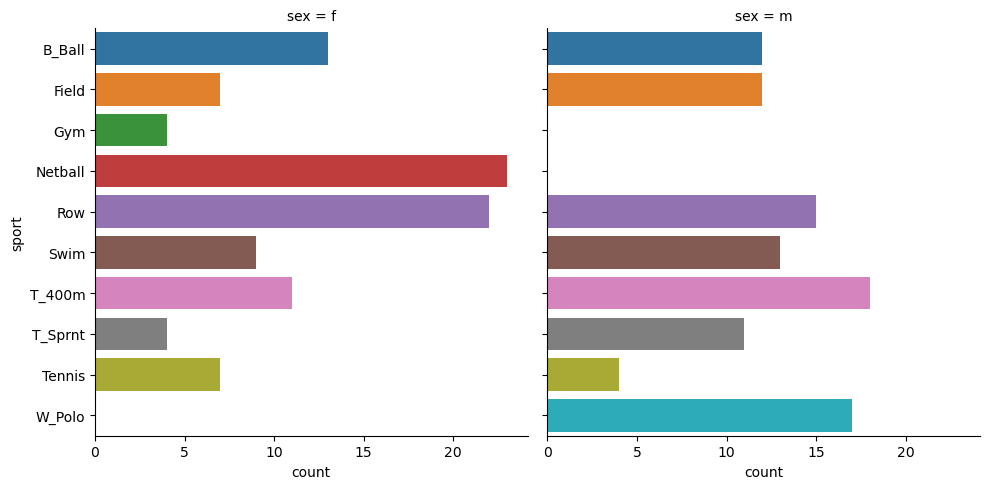

In [5]:
#Categorical boxplots
sns.catplot(data = ais, kind = "count", y = "sport")
sns.catplot(data = ais, kind = "count", y = "sex")
sns.catplot(data = ais, kind = "count", col="sex", y = "sport")

<AxesSubplot:xlabel='ht', ylabel='Density'>

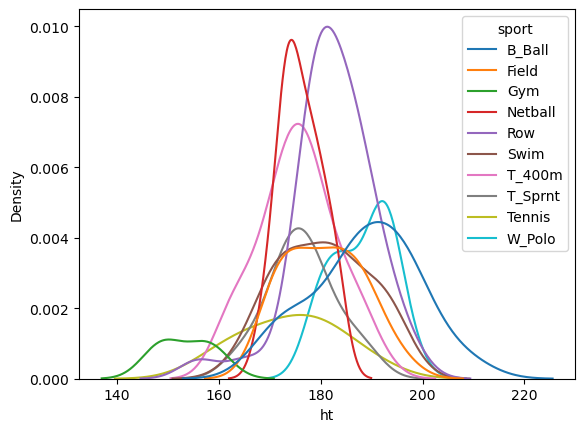

In [18]:
#Box and whisker of ht
#sns.boxplot(data= ais, x="ht")
#sns.boxplot(data= ais, x="ht", y="sport")
#sns.boxplot(data= ais, x="ht", y="sex")
#Histogram
#sns.displot(data=ais, x="ht", kde=True)
#Violin
#sns.violinplot(data=ais, x="ht", y="sex")
#Kdeplot
#sns.kdeplot(data=ais, x='ht', hue="sex")
sns.kdeplot(data=ais, x='ht', hue="sport")


Select the following subsets from the dataset and calculate for each the appropriate measures of central tendency (and, when possible, dispersion) of the variables `ht` and `sex`:

1. the rowers
2. the rowers, netball and tennis players together
3. the female basketball players and rowers together

In [19]:
row = ais[ais.sport=="Row"]
row_net_tennis = ais[(ais.sport == "Tennis") | (ais.sport == "Row") | (ais.sport == "Netball")]
f_basket_row = ais[(ais.sex == "f") & ((ais.sport == "Row") | (ais.sport == "B_Ball"))]

In [20]:
row.sex.mode()

0    f
Name: sex, dtype: category
Categories (2, object): ['f', 'm']

In [25]:
print(f"Frequencies of row.sex:\n{row.sex.value_counts()}")
print(f"Frequencies of row_net_tennis.sex:\n{row_net_tennis.sex.value_counts()}")
print(f"Frequencies of f_basket_row_sex:\n{f_basket_row.sex.value_counts()}")

Frequencies of row.sex:
f    22
m    15
Name: sex, dtype: int64
Frequencies of row_net_tennis.sex:
f    52
m    19
Name: sex, dtype: int64
Frequencies of f_basket_row_sex:
f    35
m     0
Name: sex, dtype: int64


In [30]:
#Measures for central tendency and dispersion
print(f"Central tendencies of row.ht:\n{row.ht.describe()}")
print(f"Central tendencies of row_net_tennis.ht:\n{row_net_tennis.ht.describe()}")
print(f"Central tendencies of f_basket_row.ht:\n{f_basket_row.ht.describe()}")

#Median (two different solutions)
print(f"Median by median function:\n{f_basket_row.ht.median()}")
print(f"Median by describe function:\n{f_basket_row.ht.describe()['50%']}")
#IQR
print(f"IQR:\n{f_basket_row.ht.describe()['75%'] - f_basket_row.ht.describe()['25%']}")

Central tendencies of row.ht:
count     37.000000
mean     182.375676
std        7.798376
min      156.000000
25%      179.300000
50%      181.800000
75%      186.300000
max      198.000000
Name: ht, dtype: float64
Central tendencies of row_net_tennis.ht:
count     71.000000
mean     179.066197
std        7.936371
min      156.000000
25%      174.250000
50%      179.500000
75%      183.400000
max      198.000000
Name: ht, dtype: float64
Central tendencies of f_basket_row.ht:
count     35.000000
mean     180.125714
std        7.144078
min      156.000000
25%      177.400000
50%      179.700000
75%      184.650000
max      195.900000
Name: ht, dtype: float64
Median by median function:
179.7
Median by describe function:
179.7
IQR:
7.249999999999972


## Check your answers

As a check, here are the results of the last question. First the frequencies and mode of the variable `sex`:

|           | Selection 1 | Selection 2 | Selection 3 |
| :-------- | :---------- | :---------- | :---------- |
| **f**     | 22          | 52          | 35          |
| **m**     | 15          | 19          | 0           |
| **mode**  | f           | f           | f           |

Then the relevant measures for central tendency and dispersion for `ht` (max. 3 decimal places):

| Statistic  | Selection 1 | Selection 2 | Selection 3 |
| :--------- | :---------- | :---------- | :---------- |
| mean       | 182.376     | 179.066     | 180.126     |
| stdev      | 7.798       | 7.936       | 7.144       |
| min        | 156         | 156         | 156         |
| Q1         | 179.3       | 174.25      | 177.4       |
| median     | 181.8       | 179.5       | 179.7       |
| Q3         | 186.3       | 183.4       | 184.65      |
| max        | 198         | 198         | 195.9       |
| IQR        | 7           | 9.15        | 7.250       |